# 사전 준비

## 구글 드라이브 마운트

1) 왼쪽의 네 개 아이콘 중, 맨 아래 아이콘 클릭해,

2) Google Drive 아이콘 클릭하여, Google Drive를 마운트합니다.

In [1]:
import os
base_gdrive_path = 'drive/MyDrive/lecture_220711'

# base_gdrive_path = os.path.join('drive', 'MyDrive', 'lecture_220711')

# Imports

In [2]:
# TensorFlow 및 tf.keras
import tensorflow as tf
from tensorflow import keras

# 도움 라이브러리
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.8.2


# Fashion MNIST

## 데이터 다운 및 분석

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
print("트레이닝 이미지 shape: {}, dtype: {}".format(train_images.shape, train_images.dtype))
print("트레이닝 라벨 shape: {}, dtype: {}".format(train_labels.shape, train_labels.dtype))

트레이닝 이미지 shape: (60000, 28, 28), dtype: uint8
트레이닝 라벨 shape: (60000,), dtype: uint8


In [6]:
print("테스트 이미지 shape: {}, dtype: {}".format(test_images.shape, test_images.dtype))
print("테스트 라벨 shape: {}, dtype: {}".format(test_labels.shape, test_labels.dtype))

테스트 이미지 shape: (10000, 28, 28), dtype: uint8
테스트 라벨 shape: (10000,), dtype: uint8


In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## 데이터 전처리

샘플 데이터 하나 살펴보기

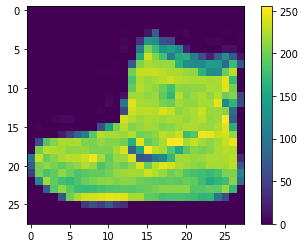

In [8]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False) #격자무늬
plt.show()

데이터를 비율로 변경. 트레이닝을 더 잘 시키기 위함

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

binary cmap으로 트레이닝 이미지 여러 개 살펴보기

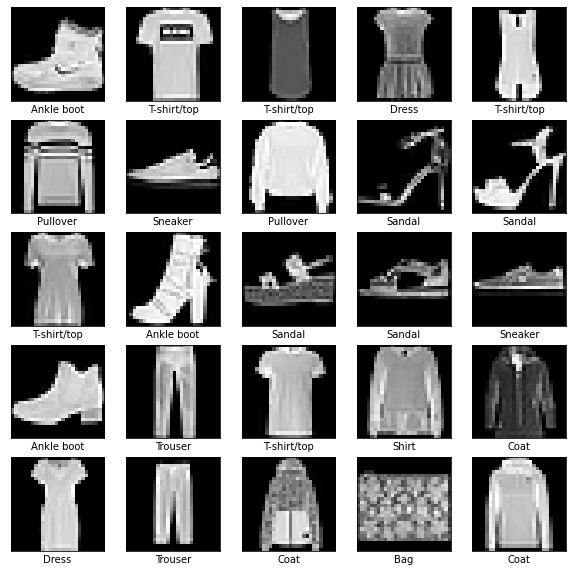

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([]) #x축을 하지 않겠다
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary.reversed())
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## 모델

### 모델 생성

In [ ]:
def model_1(input_shape=(28, 28)):
    input = keras.layers.Input(input_shape)
    flatten = keras.layer.Flatten()(input)
    return keras.models.Model(inputs=[input], outputs=[])

In [ ]:
model = model_1()
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


### 모델 예측

In [ ]:
predictions = model.predict(test_images)

In [ ]:
predictions[0]

IndexError: ignored

In [ ]:
np.argmax(predictions[0])

IndexError: ignored

In [ ]:
test_labels[0]

### 모델 예측 그리기

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [ ]:
predictions[i].shape

IndexError: ignored

IndexError: ignored

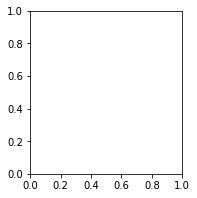

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

IndexError: ignored

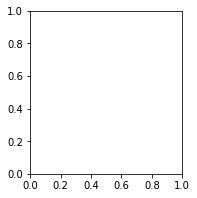

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

IndexError: ignored

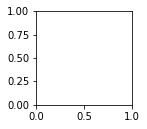

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

# 모델 저장, 가중치 저장 및 불러오기

In [ ]:
def save_model(model_name: str, model: keras.models.Model):
    model_json = model.to_json()
    with open(model_name, "w") as json_file:
        json_file.write(model_json)

In [ ]:
from keras.models import model_from_json
from typing import Optional

def load_model(model_name: str, with_weights_path: Optional[str] = None) -> keras.models.Model:
    json_file = open(model_name, "r")
    loaded_model_json = json_file.read()
    json_file.close()
    model = model_from_json(loaded_model_json)
    if with_weights_path:
        model.load_weights(with_weights_path)
    return model

In [ ]:
import os
result_path = os.path.join(base_gdrive_path, "results")

In [ ]:
save_model(os.path.join(result_path, "model_000.json"), model)

FileNotFoundError: ignored

In [ ]:
import time
run_id: str = time.strftime("%Y%m%d-%H%M%S")

model.save_weights(os.path.join(result_path, "model_000__{}.hdf5".format(run_id)))

OSError: ignored

In [ ]:
loaded_model = load_model(os.path.join(result_path, "model_000.json"))
prediction_loaded_model = loaded_model.predict(test_images)

print("트레이닝한 모델의 예측: {}".format(np.argmax(predictions[0])))
print(predictions[0])
print("불러온 모델의 예측: {}".format(np.argmax(prediction_loaded_model[0])))
print(prediction_loaded_model[0])
print("정답 :{}".format(test_labels[0]))

In [ ]:
json_model_path = os.path.join(result_path, "model_000.json")
model_weight_path = os.path.join(result_path, "model_000__{}.hdf5".format(run_id))
loaded_model_with_weight = load_model(json_model_path, model_weight_path)
prediction_loaded_model_with_weight = loaded_model_with_weight.predict(test_images)

print("트레이닝한 모델의 예측: {}".format(np.argmax(predictions[0])))
print(predictions[0])
print("가중치와 함께 불러온 모델의 예측: {}".format(np.argmax(prediction_loaded_model_with_weight[0])))
print(prediction_loaded_model_with_weight[0])
print("정답 :{}".format(test_labels[0]))

FileNotFoundError: ignored